![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcbC9JNrtvj6sdkH2pDn8Xg2u5uy_TTZ8Mzg&s)

----
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---
## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')

----
## Get some information about the data

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df.sample(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
973,334838,Economics - CFA Level 1 - 2014,https://www.udemy.com/economics-cfa-level-1-2014/,True,20,135,20,24,Beginner Level,4.000000,2014-11-08T13:48:00Z,Business Finance
1279,637402,Drawing in Perspective,https://www.udemy.com/drawing-in-perspective/,True,25,426,63,28,All Levels,3.000000,2016-05-27T19:39:14Z,Graphic Design
2108,839028,Bluegrass Guitar Essentials: Webisodes 9 & 10,https://www.udemy.com/bluegrass-guitar-essenti...,True,30,10,0,12,Intermediate Level,2.000000,2016-08-06T15:31:24Z,Musical Instruments
1029,307080,Introducción a la contabilidad,https://www.udemy.com/contabilidad-en-una-hora/,True,20,193,19,14,Beginner Level,1.000000,2014-12-17T12:50:58Z,Business Finance
3436,568524,WordPress Plugins Treasure Chest,https://www.udemy.com/best-wordpress-plugins-t...,True,25,1655,10,44,Intermediate Level,3.000000,2015-08-06T21:01:21Z,Web Development
1056,907416,Tudo sobre Investimentos em Renda Fixa,https://www.udemy.com/tudo-sobre-investimentos...,True,45,689,145,16,All Levels,2.000000,2016-08-22T14:42:20Z,Business Finance
2576,357726,Spring Framework 4 And Dependency Injection Fo...,https://www.udemy.com/spring-framework-video-t...,False,0,21147,1220,16,Beginner Level,1.500000,2015-01-16T07:45:28Z,Web Development
1255,385462,Logo Designing for Your Business in an Hour,https://www.udemy.com/logo-designing-side-busi...,True,20,25277,311,16,All Levels,1.000000,2015-01-05T10:43:48Z,Graphic Design
2742,604044,Wordpress for Beginners - Build a Live Website...,https://www.udemy.com/wordpress_for_beginners/,True,20,3877,92,15,Beginner Level,1.500000,2015-09-09T17:53:26Z,Web Development
3448,494510,WordPress Plugin Tutorial,https://www.udemy.com/wordpress-plugin-tutorial/,True,40,1588,8,15,Beginner Level,0.566667,2015-05-14T21:38:00Z,Web Development


In [6]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


---
## Data Cleaning

In [7]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [8]:
# remove unnecassary columns

df.drop(['url','course_id'],axis=1,inplace=True)

In [9]:
# convert the is_paid column from boolean to string
# convert the published_timestamp column from object to datetime

df['is_paid']=df['is_paid'].astype(str)
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [10]:
df.is_paid.replace(['True', 'False'], ['paid', 'unpaid'], inplace=True)

In [11]:
# display the duplicated rows

df[df.duplicated()]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,Essentials of money value: Get a financial Life !,paid,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,Introduction to Forex Trading Business For Beg...,paid,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,Understanding Financial Statements,paid,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,CFA Level 2- Quantitative Methods,paid,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,MicroStation - Células,paid,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,Learn Web Designing & HTML5/CSS3 Essentials in...,paid,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [12]:
# remove duplicated rows

df.drop_duplicates(inplace=True)

In [13]:
# function that remove outliers 

def detect_outliers(column):
    q3=np.quantile(df[column],0.75)
    q1=np.quantile(df[column],0.25)
    
    iqr=q3-q1
    
    lower_limit = q1-(1.5*iqr)
    higher_limit = q3 +(1.5*iqr)
    
    cleaned_data = df[(df[column] > lower_limit) & (df[column] < higher_limit)]
    return cleaned_data

In [14]:
# remove outliers from columns

columns=['price','num_subscribers','num_reviews','num_lectures','content_duration']
for column in columns:
    df=detect_outliers(column)

In [15]:
# display the data after edits

df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,paid,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,paid,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,paid,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
8,Options Trading 3 : Advanced Stock Profit and ...,paid,195,5172,34,38,Expert Level,2.5,2015-05-28 00:14:03+00:00,Business Finance


In [16]:
df.shape

(2415, 10)

In [17]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000
mean,57.648033,940.799586,17.716770,23.267081,2.060697
std,54.588127,1227.219640,21.440021,14.303416,1.254376
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,50.000000,3.000000,12.000000,1.000000
50%,40.000000,420.000000,9.000000,20.000000,1.500000
75%,70.000000,1357.500000,25.000000,30.000000,3.000000
max,200.000000,6134.000000,101.000000,76.000000,5.500000


____
## Data Visualization

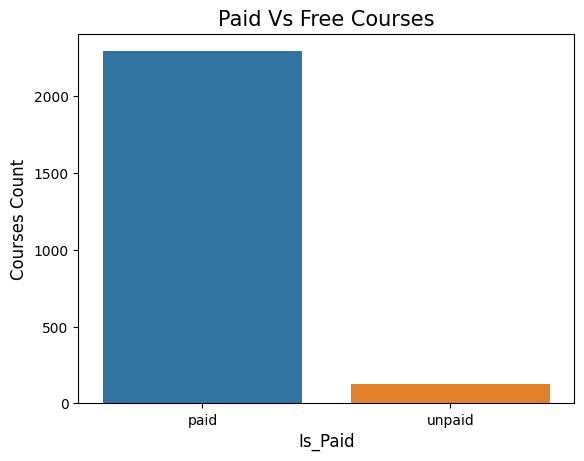

In [18]:
# Paid vs Free Courses

sns.countplot(x='is_paid',data=df)
plt.xlabel('Is_Paid',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.title('Paid Vs Free Courses',fontsize=15)
plt.show()

In [19]:
df['is_paid'].value_counts()

is_paid
paid      2288
unpaid     127
Name: count, dtype: int64

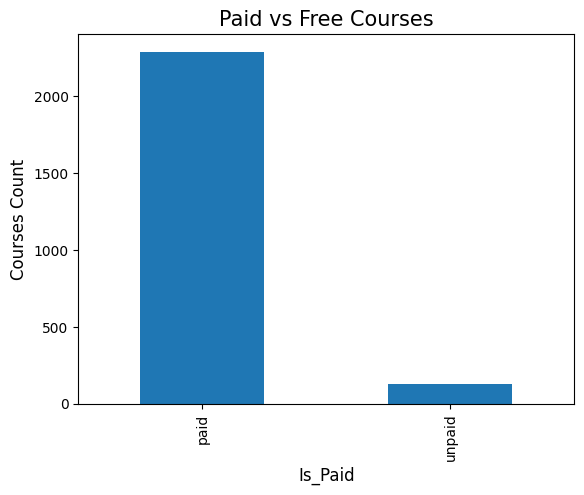

In [20]:
df['is_paid'].value_counts().plot(kind='bar')
plt.xlabel('Is_Paid',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.title('Paid vs Free Courses',fontsize=15)
plt.show()

### <font color = red> Result </font>: Most of the courses are paid


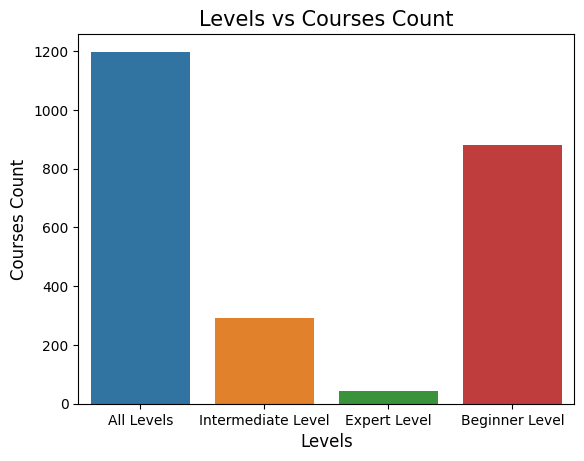

In [21]:
sns.countplot(x='level',data=df)
plt.xlabel('Levels',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.title('Levels vs Courses Count',fontsize=15)
plt.show()

### <font color = red> Result </font>: Most of the courses are All Levels and Beginner Level

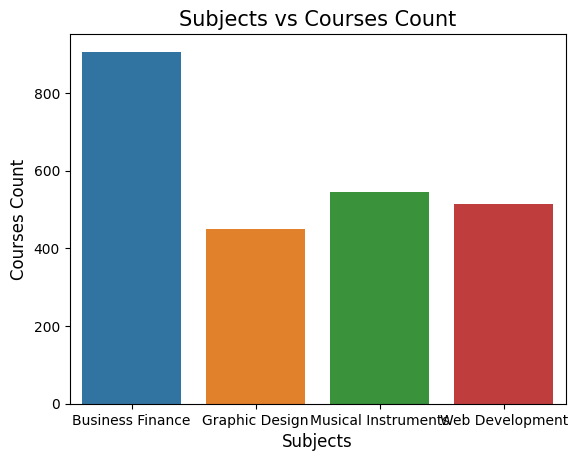

In [22]:
sns.countplot(x='subject',data=df)
plt.xlabel('Subjects',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.title('Subjects vs Courses Count',fontsize=15)
plt.show()

In [23]:
df['subject'].value_counts()

subject
Business Finance       906
Musical Instruments    546
Web Development        513
Graphic Design         450
Name: count, dtype: int64

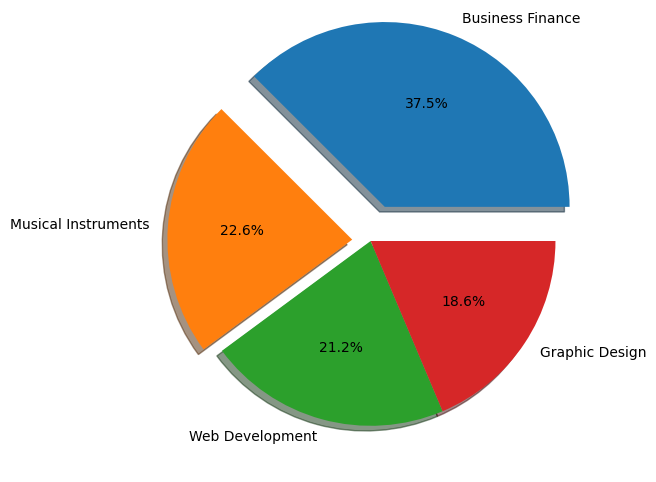

In [24]:
plt.figure(figsize=(8,6))

plt.pie(x=df['subject'].value_counts().values,
        labels=df['subject'].value_counts().index,
        autopct="%.1f%%",
        explode=[.2,.1,0,0],
        shadow=True
       )
plt.show()

### <font color = red> Result </font>: Most required field is Business Finance

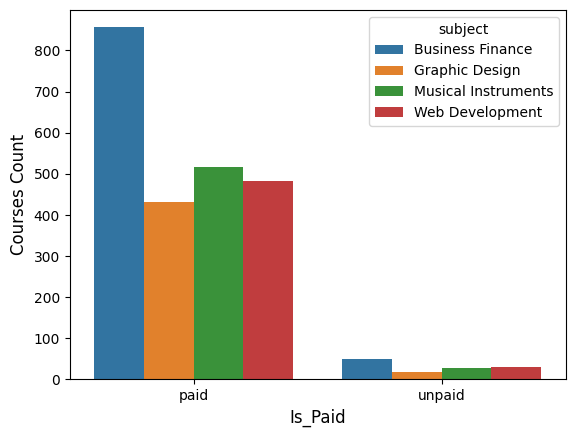

In [25]:
sns.countplot(x='is_paid',hue='subject',data=df)
plt.xlabel('Is_Paid',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.show()

### <font color = red> Result </font>: Most Paid and Free Courses are Business Finance

In [26]:
df.corr(numeric_only=True)

,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.071248,0.118132,0.204151,0.176006
num_subscribers,0.071248,1.000000,0.511564,0.036341,0.016823
num_reviews,0.118132,0.511564,1.000000,0.167380,0.169466
num_lectures,0.204151,0.036341,0.167380,1.000000,0.621993
content_duration,0.176006,0.016823,0.169466,0.621993,1.000000


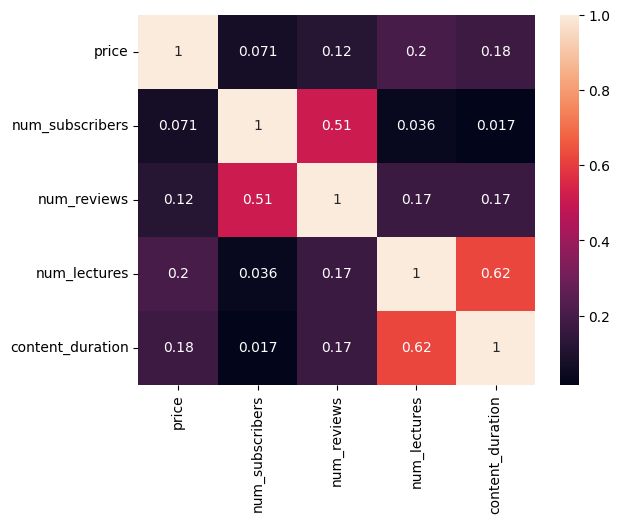

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

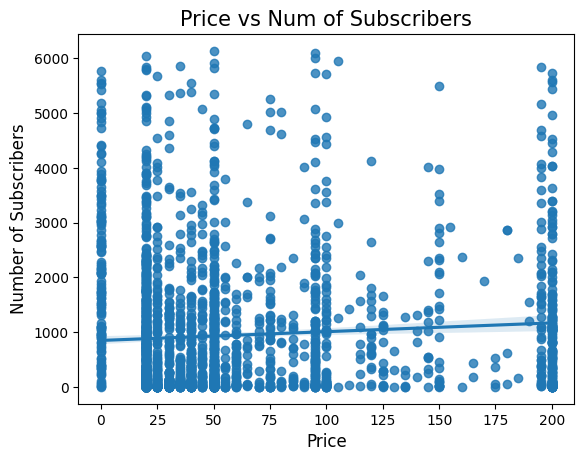

In [28]:
# Price vs Num of Subscribers

sns.regplot(x='price',y='num_subscribers',data=df)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Number of Subscribers',fontsize=12)
plt.title('Price vs Num of Subscribers',fontsize=15)
plt.show()

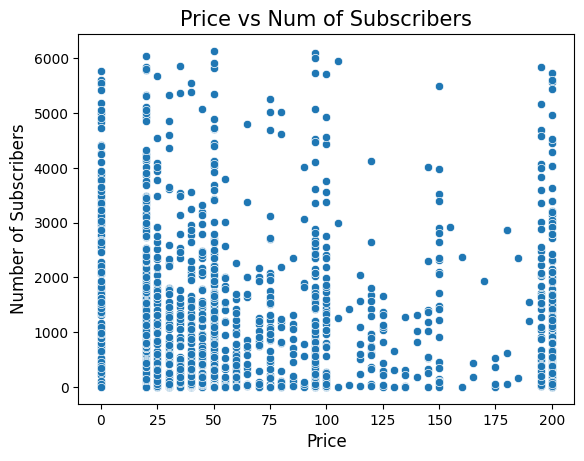

In [29]:
sns.scatterplot(x='price',y='num_subscribers',data=df)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Number of Subscribers',fontsize=12)
plt.title('Price vs Num of Subscribers',fontsize=15)
plt.show()

### <font color = red> Result </font>: Course Price Doesn't Affect The Number Of Subscribers

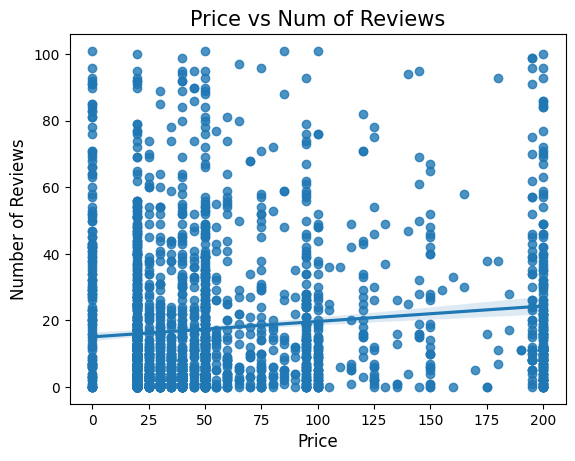

In [30]:
# Price vs Num of Reviews

sns.regplot(x='price',y='num_reviews',data=df)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Number of Reviews',fontsize=12)
plt.title('Price vs Num of Reviews',fontsize=15)
plt.show()

### <font color = red> Result </font>: Course Price Doesn't Affect The Number Of Reviews

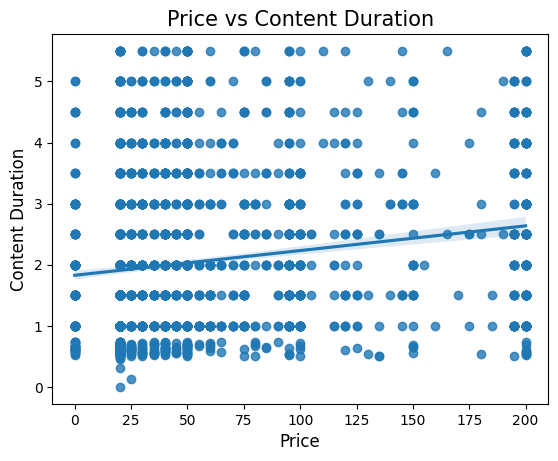

In [31]:
# Price vs Content Duration

sns.regplot(x='price',y='content_duration',data=df)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Content Duration',fontsize=12)
plt.title('Price vs Content Duration',fontsize=15)
plt.show()

### <font color = red> Result </font>: Content Duration Doesn't Affect The Course Price

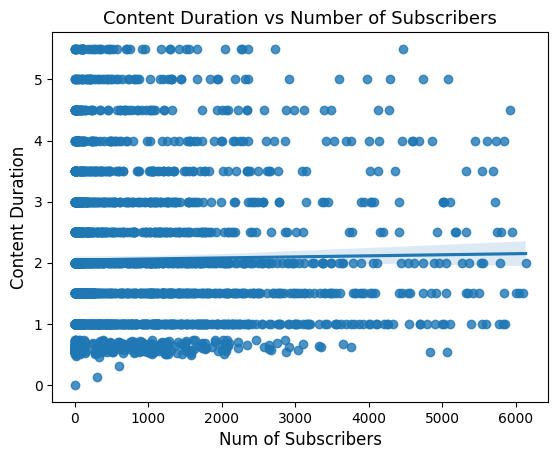

In [32]:
# Content Duration vs Number of Subscribers

sns.regplot(x='num_subscribers',y='content_duration',data=df)
plt.xlabel('Num of Subscribers',fontsize=12)
plt.ylabel('Content Duration',fontsize=12)
plt.title('Content Duration vs Number of Subscribers',fontsize=13)
plt.show()

### <font color = red> Result </font>: Content Duration Doesn't Affect The Number of Subscribers

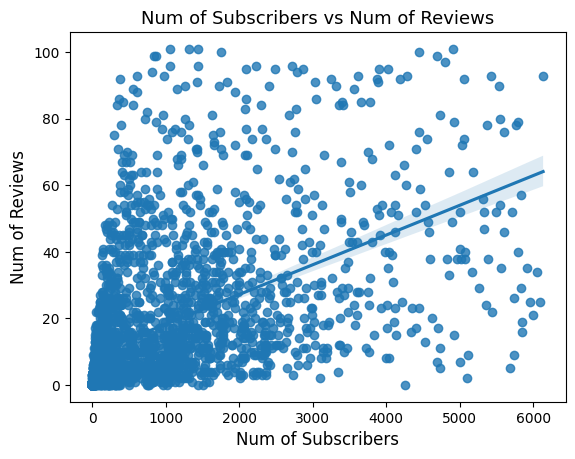

In [33]:
# Num of Subscribers vs Num of Reviews

sns.regplot(x='num_subscribers',y='num_reviews',data=df)
plt.xlabel('Num of Subscribers',fontsize=12)
plt.ylabel('Num of Reviews',fontsize=12)
plt.title('Num of Subscribers vs Num of Reviews',fontsize=13)
plt.show()

### <font color = red> Result </font>: Number of Subscribers Affect The Number of Reviews

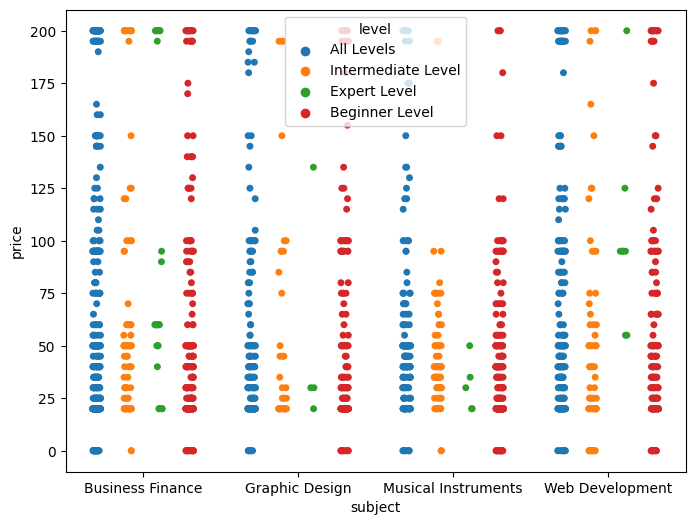

In [34]:
plt.figure(figsize=(8,6))
sns.stripplot(x='subject',y='price',hue='level',data=df,dodge=True)
plt.show()

-----
## <font color=red>Insights</font>
- Most of the courses are paid
- Most of the courses are All Levels and Beginner Level
- Most Paid and Free Courses are Business Finance
- Course Price Doesn't Affect The Number Of Subscribers
- Course Price Doesn't Affect The Number Of Reviews
- Content Duration Doesn't Affect The Course Price
- Content Duration Doesn't Affect The Number of Subscribers
- Number of Subscribers Affect The Number of Reviews